In [2]:
import pandas as pd


data = pd.read_csv('D:/Stuff/Files/Downloads/mls-salaries-master/mls-salaries-master/csvs/mlssalaries.csv')


In [3]:
# 1.Check data distribution
print(data.head())


print(data.describe())

print(data.info())

  club last_name first_name position  base_salary  guaranteed_compensation
0  ATL   Almiron     Miguel        M    1912500.0               2297000.00
1  ATL   Ambrose      Mikey        D      65625.0                 65625.00
2  ATL      Asad      Yamil        M     150000.0                150000.00
3  ATL     Bloom       Mark        D      99225.0                106573.89
4  ATL  Carleton     Andrew        F      65000.0                 77400.00
        base_salary  guaranteed_compensation
count  6.160000e+02             6.160000e+02
mean   2.969777e+05             3.261392e+05
std    6.715792e+05             7.480007e+05
min    5.299992e+04             5.299992e+04
25%    6.563130e+04             6.990325e+04
50%    1.250000e+05             1.350020e+05
75%    2.553750e+05             2.809390e+05
max    6.660000e+06             7.167500e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 6 columns):
 #   Column                   Non-Null Co

In [4]:
#2.Check skewness in data
import numpy as np

numeric_data = data.select_dtypes(include=[np.number])

skewness = numeric_data.skew()


print(skewness)


base_salary                6.593527
guaranteed_compensation    6.475460
dtype: float64


In [5]:
# 3.Standardize and normalize data
from sklearn.preprocessing import StandardScaler, MinMaxScaler


data_standardized = StandardScaler().fit_transform(data.select_dtypes(include=['int64', 'float64']))
data_standardized = pd.DataFrame(data_standardized, columns=data.select_dtypes(include=['int64', 'float64']).columns)

data_normalized = MinMaxScaler().fit_transform(data.select_dtypes(include=['int64', 'float64']))
data_normalized = pd.DataFrame(data_normalized, columns=data.select_dtypes(include=['int64', 'float64']).columns)

print("Standardized Data:")
print(data_standardized.head())

print("\nNormalized Data:")
print(data_normalized.head())




Standardized Data:
   base_salary  guaranteed_compensation
0     2.407512                 2.636979
1    -0.344771                -0.348564
2    -0.219032                -0.235671
3    -0.294699                -0.293775
4    -0.345702                -0.332809

Normalized Data:
   base_salary  guaranteed_compensation
0     0.281444                 0.315412
1     0.001911                 0.001775
2     0.014681                 0.013634
3     0.006996                 0.007530
4     0.001816                 0.003430


In [6]:
# 4.Correct data format
print(data.head())

data.to_csv('D:/Stuff/Files//Downloads/mls-salaries-master/mls-salaries-master/csvs/corr.csv.txt.csv', index=False)

print("Data format corrected and saved to 'D:/Stuff/Files//Downloads/mls-salaries-master/mls-salaries-master/csvs/corr.csv.txt.csv'.")


  club last_name first_name position  base_salary  guaranteed_compensation
0  ATL   Almiron     Miguel        M    1912500.0               2297000.00
1  ATL   Ambrose      Mikey        D      65625.0                 65625.00
2  ATL      Asad      Yamil        M     150000.0                150000.00
3  ATL     Bloom       Mark        D      99225.0                106573.89
4  ATL  Carleton     Andrew        F      65000.0                 77400.00
Data format corrected and saved to 'D:/Stuff/Files//Downloads/mls-salaries-master/mls-salaries-master/csvs/corr.csv.txt.csv'.


In [7]:
# 5.Check data details (type, summary, info etc.)
print(data.head())

print(data.info())


print(data.describe())

for column in data.columns:
    print(f"Unique values in {column}: {data[column].unique()}")


for column in data.columns:
    print(f"Value counts for {column}:\n{data[column].value_counts()}")


print(data.dtypes)

print(data.shape)


  club last_name first_name position  base_salary  guaranteed_compensation
0  ATL   Almiron     Miguel        M    1912500.0               2297000.00
1  ATL   Ambrose      Mikey        D      65625.0                 65625.00
2  ATL      Asad      Yamil        M     150000.0                150000.00
3  ATL     Bloom       Mark        D      99225.0                106573.89
4  ATL  Carleton     Andrew        F      65000.0                 77400.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club                     614 non-null    object 
 1   last_name                616 non-null    object 
 2   first_name               612 non-null    object 
 3   position                 616 non-null    object 
 4   base_salary              616 non-null    float64
 5   guaranteed_compensation  616 non-null    float64
dtypes: float6

In [11]:
# 6.Find missing values and deal with missing value either by dropping records/features or by imputation
import numpy as np


num_values_to_drop = 5


random_indices = np.random.choice(data.index, size=num_values_to_drop, replace=False)

data_dropped = data.drop(random_indices)

print(data_dropped)

    club last_name    first_name position  base_salary  \
0    ATL   Almiron        Miguel        M    1912500.0   
1    ATL   Ambrose         Mikey        D      65625.0   
2    ATL      Asad         Yamil        M     150000.0   
3    ATL     Bloom          Mark        D      99225.0   
4    ATL  Carleton        Andrew        F      65000.0   
..   ...       ...           ...      ...          ...   
611  VAN  Tornaghi         Paolo       GK      80000.0   
612  VAN    Waston       Kendall        D     350000.0   
613  VAN  Williams       Sheanon        D     175000.0   
614  NaN   Babouli            Mo        F      54075.0   
615  NaN    Ramajo  David Mateos        D     420000.0   

     guaranteed_compensation  
0                 2297000.00  
1                   65625.00  
2                  150000.00  
3                  106573.89  
4                   77400.00  
..                       ...  
611                 80000.00  
612                368125.00  
613                18400

In [12]:
# 7.Deal with categorical features 
from sklearn.preprocessing import LabelEncoder


encoded_data = data.copy()
encoded_data[data.select_dtypes(include=['object']).columns] = data.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)


frequency_encoded_data = data.copy()
frequency_encoded_data[data.select_dtypes(include=['object']).columns] = data.select_dtypes(include=['object']).apply(lambda x: x.map(x.value_counts(normalize=True)))

print("Encoded Data:\n", encoded_data)
print("\nFrequency Encoded Data:\n", frequency_encoded_data)




Encoded Data:
      club  last_name  first_name  position  base_salary  \
0       0         21         280         6    1912500.0   
1       0         29         282         0      65625.0   
2       0         39         383         6     150000.0   
3       0         76         261         0      99225.0   
4       0        103          27         2      65000.0   
..    ...        ...         ...       ...          ...   
611    22        518         302         5      80000.0   
612    22        542         229         0     350000.0   
613    22        549         351         0     175000.0   
614    23         47         285         2      54075.0   
615    23        427         104         0     420000.0   

     guaranteed_compensation  
0                 2297000.00  
1                   65625.00  
2                  150000.00  
3                  106573.89  
4                   77400.00  
..                       ...  
611                 80000.00  
612                368125.00

In [15]:
# 8.Analyze individual feature patterns using visualization
import numpy as np

numeric_columns = data.select_dtypes(include=np.number).columns


data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

non_numeric_columns = data.select_dtypes(exclude=np.number).columns

data = data.drop(columns=non_numeric_columns)


print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   base_salary              616 non-null    float64
 1   guaranteed_compensation  616 non-null    float64
dtypes: float64(2)
memory usage: 9.8 KB
None


In [16]:
# 9.Analyze data using grouping and descriptive statistics. (count, mean, sd, boxplot, etc.)
import matplotlib.pyplot as plt
import seaborn as sns

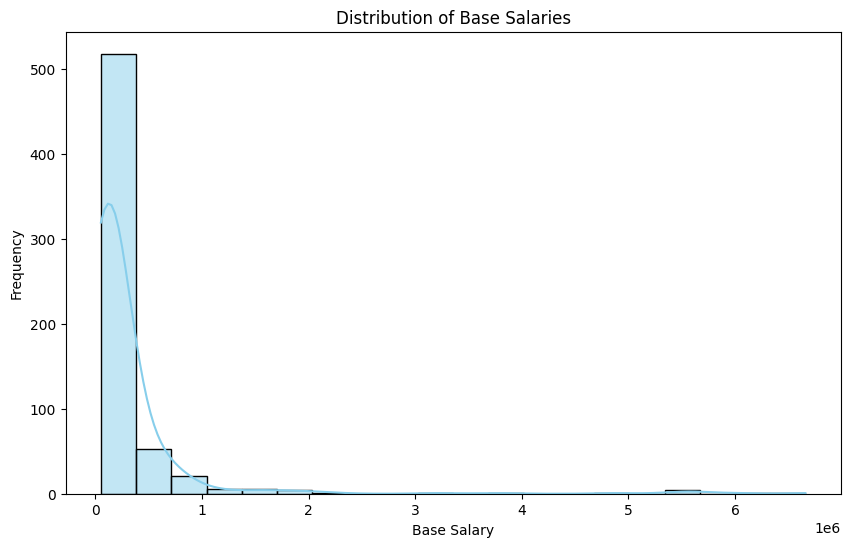

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data['base_salary'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Base Salaries')
plt.xlabel('Base Salary')
plt.ylabel('Frequency')
plt.show()


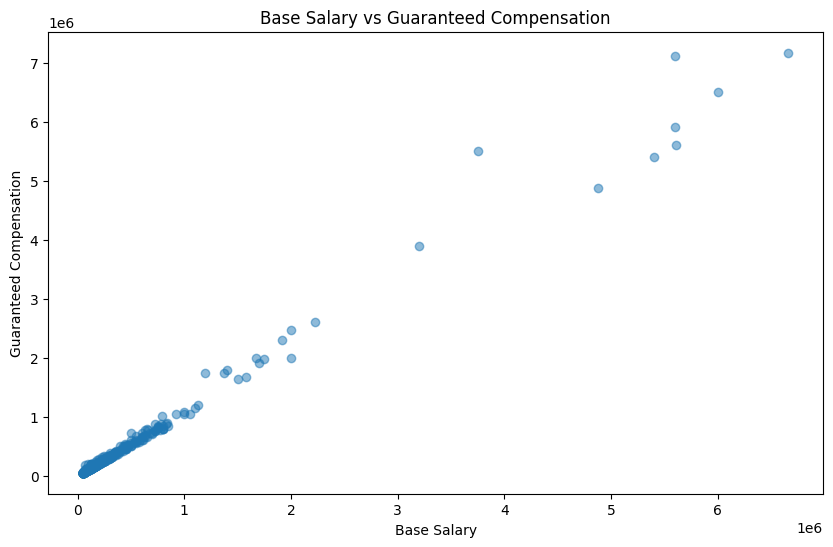

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(data['base_salary'], data['guaranteed_compensation'], alpha=0.5)
plt.title('Base Salary vs Guaranteed Compensation')
plt.xlabel('Base Salary')
plt.ylabel('Guaranteed Compensation')
plt.show()


In [65]:

grouped_data = data.groupby('guaranteed_compensation')


count_players = grouped_data.size()


mean_salary = grouped_data['base_salary'].mean()


std_salary = grouped_data['base_salary'].std()


<Axes: title={'center': 'base_salary'}, xlabel='guaranteed_compensation'>

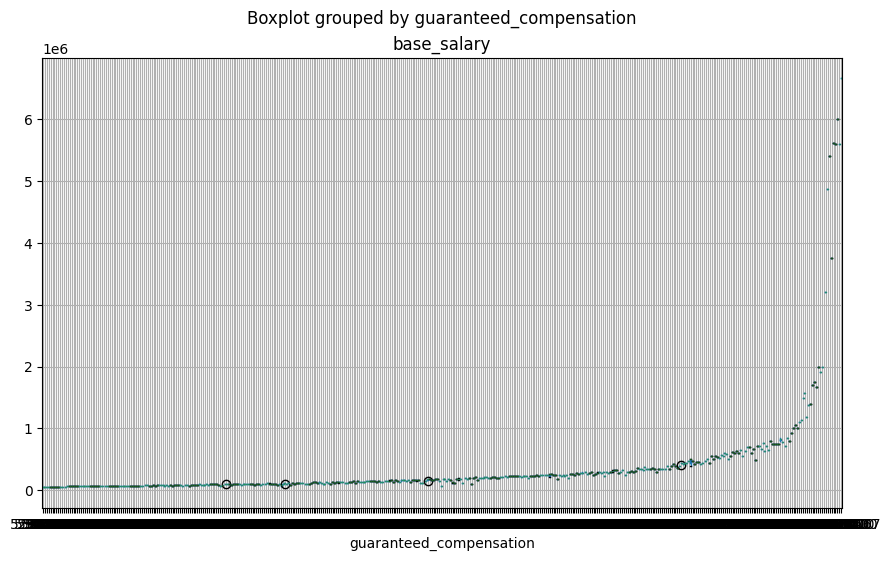

In [66]:

summary_stats = data['base_salary'].describe()

data.boxplot(column='base_salary', by='guaranteed_compensation', figsize=(10, 6))
